# Intialize

In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

# 'k_pivot': 0.05,
# 'N_ncdm': 1,
# 'N_ur': 2.0328,
# 'm_ncdm': 0.06    

}




common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 5e9, ## chosing larger masses than 1e10 seems to not give good 1-halo term
'M_max' : 3.5e15,
    

'delta for galaxies' : "200c",
'delta for matter density' : "200c",
'delta for electron density':"200c",    

'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,

'm_to_xout_epsrel': 1e-7,
    
'N_samp_fftw' : 4096,
'x_min_gas_density_fftw' : 1e-4, # to get uk; that determines the k grid for the uk profile 
'x_max_gas_density_fftw' : 1e8, # to get uk; that determines the k grid for the uk profile 

# 'ndim_redshifts' :250,
# 'ndim_masses' :250,
    
# 'n_m_density_profile' : 150, # default= 100 decrease for faster
# 'n_z_density_profile' : 150, # default= 100 decrease for faster

'non_linear' : 'hmcode',
# 'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 0,
    
'f_free' : 1.0,
    

# 'ndim_masses': 150,
# 'ndim_redshifts': 150,

# 'P_k_max_h/Mpc': 50.0,
# 'k_min_for_pk_class_sz': 0.0001,
# 'k_max_for_pk_class_sz': 10.0,
# 'k_per_decade_class_sz': 20.0,
    
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_density_profile (electrons)': 1., 
'use_xout_in_density_profile_from_enclosed_mass': 1,
'normalize_gas_density_profile': 0, # only useful when we dont set xout_in_density_profile_from_enclosed_mass, e.g., computing the transform as in Cayuso et al 2021 
    

'truncate_wrt_rvir':0,
    
    
'n_mass_m_to_xout':50,
'n_z_m_to_xout':50,
    
}

In [20]:
import classy_sz
classy_sz.__file__

'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

## The power spectrum

In [21]:
%%time
z_for_pk_hm = 1.

M = Class()
# M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h',
'gas profile':'B16',
'gas profile mode' : 'shock',

'use_fft_for_profiles_transform':1,
'x_out_truncated_density_profile (electrons)': 1., 
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
    


"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,

# 'k_min_gas_density_profile' : 1e-7,
    
# 'hm_consistency' : 0,
})



M.compute_class_szfast()
pk_at_z_hm = M.pk_at_z_hm()
pk_at_z_class_halofit = np.vectorize(M.pk)
pk_bb_at_z_hm_shock = M.pk_bb_at_z_hm()

CPU times: user 11 s, sys: 290 ms, total: 11.3 s
Wall time: 1.63 s


In [22]:
%%time
M = Class()
# M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h',
    
'gas profile':'B16',
'gas profile mode' : 'shock',
'use_fft_for_profiles_transform':1,

'x_out_truncated_density_profile (electrons)': 1., 
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
    
'hm_consistency' : 0,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,

'k_min_gas_density_profile' : 1e-7,
    
    
})

M.compute_class_szfast()
pk_at_z_hm_no_consistency = M.pk_at_z_hm()

CPU times: user 10.7 s, sys: 234 ms, total: 11 s
Wall time: 1.55 s


In [23]:
%%time
M = Class()
# M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h',
'gas profile':'B16',
'gas profile mode' : 'agn',
'use_fft_for_profiles_transform':1,

'x_out_truncated_density_profile (electrons)': 1., 
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
    
'non_linear':'hmcode',
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
'hm_consistency' : 0,
    
})
M.compute_class_szfast()
pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_agn = M.pk_bb_at_z_hm()

CPU times: user 11.2 s, sys: 341 ms, total: 11.5 s
Wall time: 1.62 s


In [24]:
%%time
M = Class()
# M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_b_at_z_2h',
'gas profile':'BCM',
# 'gas profile mode' : 'agn',
'use_fft_for_profiles_transform':1,

'x_out_truncated_density_profile (electrons)': 50., 
# 'normalize_gas_density_profile' : 1,
'use_xout_in_density_profile_from_enclosed_mass' : 0,
    
'non_linear':'hmcode',
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,

'hm_consistency' : 0,
    
# 'fstar_ms' : 0.,
# 'n_k_density_profile' : 400, # default 80
'n_m_density_profile' : 80, # default= 100 decrease for faster
'n_z_density_profile' : 80, # default= 100 decrease for faster

    
    
})
M.compute_class_szfast()
# pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_bcm = M.pk_bb_at_z_hm()
kinternal, pk2h_internal = np.asarray(M.pk_b_at_z_2h()['k']),np.asarray(M.pk_b_at_z_2h()['2h']) ## this is only computed at z_for_pk_hm

CPU times: user 2min 56s, sys: 778 ms, total: 2min 57s
Wall time: 29 s


In [25]:
%%time

M = Class()
# M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_b_at_z_2h',

'gas profile':'nfw',


'x_out_truncated_density_profile (electrons)': 1., 
# 'use_fft_for_profiles_transform':1,
    


"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,

    
'n_k_density_profile' : 200, # default 80
'n_m_density_profile' : 150, # default= 100 decrease for faster
'n_z_density_profile' : 150, # default= 100 decrease for faster
    
# 'k_min_gas_density_profile' : 1e-7,
# 'k_max_gas_density_profile' : 1e4,

'k_min_gas_density_profile' : 1e-7,
'k_max_gas_density_profile' : 1e4,
})

M.compute_class_szfast()

pk_bb_at_z_hm_nfw = M.pk_bb_at_z_hm()
kinternalnfw, pk2h_internalnfw = np.asarray(M.pk_b_at_z_2h()['k']),np.asarray(M.pk_b_at_z_2h()['2h'])

CPU times: user 9.33 s, sys: 230 ms, total: 9.56 s
Wall time: 2.21 s


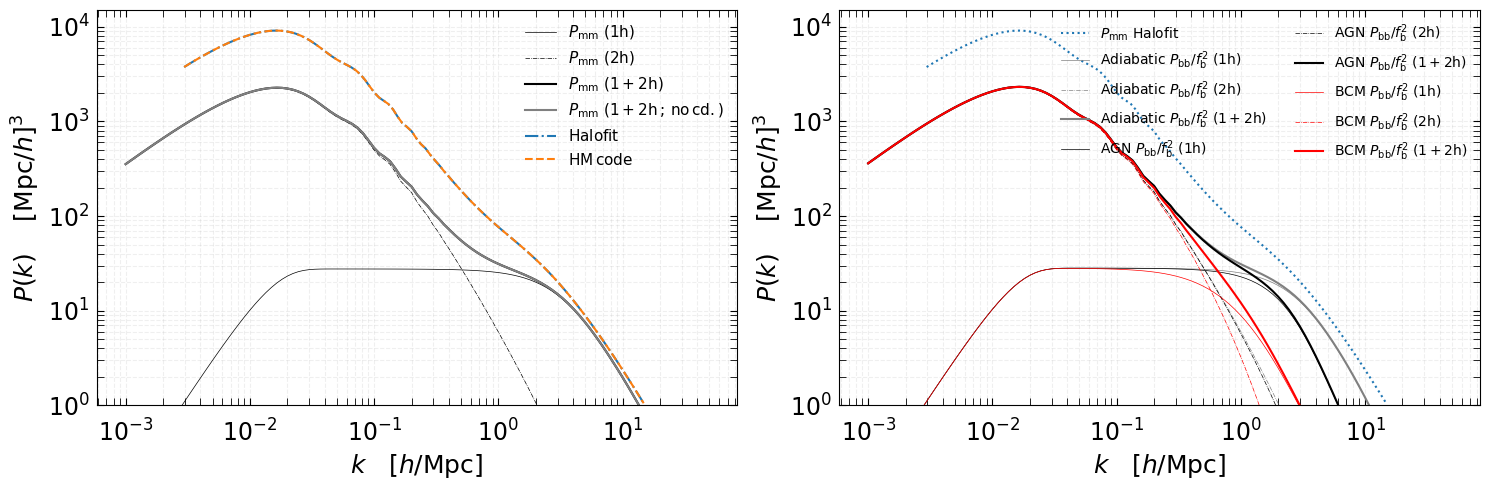

In [26]:
k_arr = np.geomspace(2e-3,1e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e0,1.5e4)
# ax.set_xlim(1e-2,1e1)

ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = '$P_\mathrm{mm}$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = '$P_\mathrm{mm}$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_at_z_hm['k'],np.asarray(pk_at_z_hm['2h'])+np.asarray(pk_at_z_hm['1h']),label = '$P_\mathrm{mm}$ $\mathrm{(1+2h)}$',c='k',ls='-')

ax.plot(pk_at_z_hm_no_consistency['k'],np.asarray(pk_at_z_hm_no_consistency['2h'])+np.asarray(pk_at_z_hm_no_consistency['1h']),label = '$P_\mathrm{mm}$ $\mathrm{(1+2h\,;\,no\,cd.)}$',c='grey',ls='-')

ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$\mathrm{Halofit}$',ls='-.')
ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='$\mathrm{HM\,code}$',ls='--')


ax.legend(fontsize=11,ncol=1,frameon=False)




ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e0,1.5e4)
# ax.set_xlim(1e-2,1e1)


ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ $\mathrm{Halofit}$',ls=':')

ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = '$\mathrm{Adiabatic}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1h)}$',c='grey',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = '$\mathrm{Adiabatic}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(2h)}$',c='grey',ls='-.',lw=0.5)

ax.plot(pk_bb_at_z_hm_shock['k'],(np.asarray(pk_bb_at_z_hm_shock['1h'])+np.asarray(pk_bb_at_z_hm_shock['2h']))*M.get_f_b()**-2.,label = '$\mathrm{Adiabatic}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1+2h)}$',c='grey',ls='-')



ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['1h'])*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['2h'])*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],(np.asarray(pk_bb_at_z_hm_agn['1h'])+np.asarray(pk_bb_at_z_hm_agn['2h']))*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1+2h)}$',c='k',ls='-')


ax.plot(pk_bb_at_z_hm_bcm['k'],np.asarray(pk_bb_at_z_hm_bcm['1h'])*M.get_f_b()**-2.,label = '$\mathrm{BCM}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1h)}$',c='r',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_bcm['k'],np.asarray(pk_bb_at_z_hm_bcm['2h'])*M.get_f_b()**-2.,label = '$\mathrm{BCM}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(2h)}$',c='r',ls='-.',lw=0.5)
ax.plot(pk_bb_at_z_hm_bcm['k'],(np.asarray(pk_bb_at_z_hm_bcm['1h'])+np.asarray(pk_bb_at_z_hm_bcm['2h']))*M.get_f_b()**-2.,label = '$\mathrm{BCM}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1+2h)}$',c='r',ls='-')




ax.legend(fontsize=10,ncol=2,frameon=False)
fig.tight_layout()

# plt.savefig('figures/hmpks.pdf')


If the BCM doesnt look to match the other pk at low k, this is because of fstar in the normalization. 

In [37]:
font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

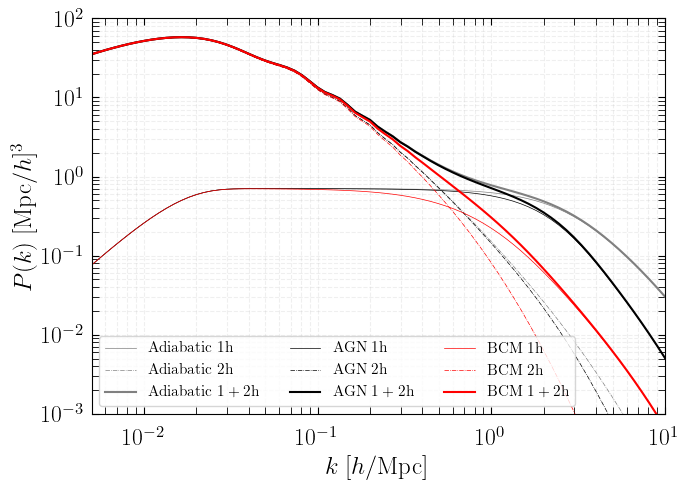

In [46]:
k_arr = np.geomspace(2e-3,1e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))

z_arr = np.linspace(1e-8,4.,1000)
# ax = ax1
# ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
# ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
# plt.setp(ax.get_xticklabels(), fontsize=label_size)
# ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
# ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
# ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(1e0,1.5e4)
# # ax.set_xlim(1e-2,1e1)

# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = '$P_\mathrm{mm}$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = '$P_\mathrm{mm}$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
# ax.plot(pk_at_z_hm['k'],np.asarray(pk_at_z_hm['2h'])+np.asarray(pk_at_z_hm['1h']),label = '$P_\mathrm{mm}$ $\mathrm{(1+2h)}$',c='k',ls='-')

# ax.plot(pk_at_z_hm_no_consistency['k'],np.asarray(pk_at_z_hm_no_consistency['2h'])+np.asarray(pk_at_z_hm_no_consistency['1h']),label = '$P_\mathrm{mm}$ $\mathrm{(1+2h\,;\,no\,cd.)}$',c='grey',ls='-')

# ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$\mathrm{Halofit}$',ls='-.')
# ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='$\mathrm{HM\,code}$',ls='--')


# ax.legend(fontsize=11,ncol=1,frameon=False)




ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-3,1.e2)
ax.set_xlim(5e-3,1e1)


# ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ $\mathrm{Halofit}$',ls=':')

ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**0,label = '$\mathrm{Adiabatic}$ $\mathrm{1h}$',c='grey',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**0,label = '$\mathrm{Adiabatic}$ $\mathrm{2h}$',c='grey',ls='-.',lw=0.5)

ax.plot(pk_bb_at_z_hm_shock['k'],(np.asarray(pk_bb_at_z_hm_shock['1h'])+np.asarray(pk_bb_at_z_hm_shock['2h']))*M.get_f_b()**0,label = '$\mathrm{Adiabatic}$ $\mathrm{1+2h}$',c='grey',ls='-')



ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['1h'])*M.get_f_b()**0,label = '$\mathrm{AGN}$ $\mathrm{1h}$',c='k',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['2h'])*M.get_f_b()**0,label = '$\mathrm{AGN}$ $\mathrm{2h}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],(np.asarray(pk_bb_at_z_hm_agn['1h'])+np.asarray(pk_bb_at_z_hm_agn['2h']))*M.get_f_b()**0,label = '$\mathrm{AGN}$ $\mathrm{1+2h}$',c='k',ls='-')


ax.plot(pk_bb_at_z_hm_bcm['k'],np.asarray(pk_bb_at_z_hm_bcm['1h'])*M.get_f_b()**0,label = '$\mathrm{BCM}$ $\mathrm{1h}$',c='r',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_bcm['k'],np.asarray(pk_bb_at_z_hm_bcm['2h'])*M.get_f_b()**0,label = '$\mathrm{BCM}$ $\mathrm{2h}$',c='r',ls='-.',lw=0.5)
ax.plot(pk_bb_at_z_hm_bcm['k'],(np.asarray(pk_bb_at_z_hm_bcm['1h'])+np.asarray(pk_bb_at_z_hm_bcm['2h']))*M.get_f_b()**0,label = '$\mathrm{BCM}$ $\mathrm{1+2h}$',c='r',ls='-')




ax.legend(fontsize=11,ncol=3,frameon=True)
fig.tight_layout()
plt.savefig('figures/hmpkbs_nocd_z1.pdf')

In [12]:



# match dw parameters 
cosmo_params = {
'omega_b': 0.02237,
'omega_cdm':  0.1200,
'H0': 67.32,
'tau_reio': 0.0561,
'sigma8': 0.811,
'n_s': 0.9649,

# 'k_pivot': 0.05,
# 'N_ncdm': 1,
# 'N_ur': 2.0328,
# 'm_ncdm': 0.00    

    
    
# h = 0.6732
# Omega_c = 0.1200/h**2
# Omega_b = 0.02237/h**2
# simga_8 = 0.811
# n_s = 0.9649
}




common_params = {

'z_min' : 0.00,
'z_max' : 3.0,
'M_min' : 1.0e11, 
'M_max' : 3.5e15,
    

'delta for galaxies' : "200c",
'delta for matter density' : "200c",
'delta for electron density':"200c",    

# 'mass function' : 'T08M200c',
'mass function' : 'T08M200c',
# 'mass function' : 'T10',
'concentration parameter' : 'D08',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non_linear' : 'hmcode',
# 'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 0,
    
# 'f_free' : 1.0,
    

# 'ndim_masses': 150,
# 'ndim_redshifts': 150,

# 'P_k_max_h/Mpc': 50.0,
# 'k_min_for_pk_class_sz': 0.0001,
# 'k_max_for_pk_class_sz': 10.0,
# 'k_per_decade_class_sz': 20.0,
    
# 'x_out_truncated_nfw_profile':1.,
'x_out_truncated_density_profile (electrons)': 50., 
'use_xout_in_density_profile_from_enclosed_mass': 0, # usefule for battaglia profile 
}

In [13]:
%%time

z = 0.
z_for_pk_hm = z

M = Class()
M.set(cosmo_params)
M.set(common_params)
M.set({
# class_sz parameters:
'output':'gas_density_profile_2h,dndlnM,pk_b_at_z_2h',
# 'gas profile':'BCM',
'gas profile':'BCM',
'mass function' : 'T08M200c',

'use_fft_for_profiles_transform' : 1,


'x_min_gas_density_fftw' : 1e-4, # to get uk; that determines the k grid for the uk profile 
'x_max_gas_density_fftw' : 1e7, # to get uk; that determines the k grid for the uk profile 

# 'n_k_density_profile' : 400, # default 80
'n_m_density_profile' : 100, # default= 100 decrease for faster
'n_z_density_profile' : 100, # default= 100 decrease for faster

    
'density_norm_epsrel' : 1e-6,
# 'k_min_gas_density_profile' : 1e-3,
# 'k_max_gas_density_profile' : 1e2,

'k_min_samp_fftw' : 1e-4, ## for the 2halo  FFTLog transform
'k_max_samp_fftw' : 1e4, ## for the 2halo  FFTLog transform
'N_samp_fftw' : 4096,
# 'sigma_derivative':1,
'ndim_redshifts' :150,
'ndim_masses' :150,
# # tabulation of mass function:
# 'n_z_dndlnM' : 150,
# 'n_m_dndlnM' : 500,
    
'hm_consistency':1, # something to be checked 
# 'T10_alpha_fixed': 1,
# 'normalize_gas_density_profile': 0,
    
'non_linear':'hmcode',
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
    
'k_min_gas_density_profile':1e-4,
'k_max_gas_density_profile':1e2,
        })
# M.compute_class_szfast()
M.compute()

CPU times: user 2min 9s, sys: 412 ms, total: 2min 9s
Wall time: 23.6 s


In [14]:
%%time

z = 0.
z_for_pk_hm = z

Mnfw = Class()
Mnfw.set(cosmo_params)
Mnfw.set(common_params)
Mnfw.set({
# class_sz parameters:
'output':'gas_density_profile_2h,dndlnM,pk_b_at_z_2h',
# 'gas profile':'BCM',
'gas profile':'nfw',
'mass function' : 'T08M200c',

'use_fft_for_profiles_transform' : 1,

# 'x_min_gas_density_fftw' : 1e-3, # to get uk; not red by nfw
# 'x_max_gas_density_fftw' : 1e3, # to get uk; not red by nfw
    

'n_k_density_profile' : 400, # default 80
'n_m_density_profile' : 150, # default= 100 decrease for faster
'n_z_density_profile' : 150, # default= 100 decrease for faster

'k_min_gas_density_profile' : 1e-7,
'k_max_gas_density_profile' : 1e4,

'k_min_samp_fftw' : 1e-4, ## for the 2halo  FFTLog transform
'k_max_samp_fftw' : 1e4, ## for the 2halo  FFTLog transform
'N_samp_fftw' : 4096,
# 'sigma_derivative':1,
'ndim_redshifts' :250,
'ndim_masses' :250,
# # tabulation of mass function:
# 'n_z_dndlnM' : 150,
# 'n_m_dndlnM' : 500,
    
'hm_consistency':1, # something to be checked 
# 'T10_alpha_fixed': 1,
'normalize_gas_density_profile': 0,
    
'non_linear':'hmcode',
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
        })
# M.compute_class_szfast()
Mnfw.compute()

CPU times: user 1min 5s, sys: 160 ms, total: 1min 5s
Wall time: 8.89 s


In [15]:

m200c = 1e10#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
kinternal, pk2h_internal = np.asarray(M.pk_b_at_z_2h()['k']),np.asarray(M.pk_b_at_z_2h()['2h']) ## this is only computed at z_for_pk_hm
# kinternalnfw, pk2h_internalnfw = np.asarray(Mnfw.pk_b_at_z_2h()['k']),np.asarray(Mnfw.pk_b_at_z_2h()['2h'])/M.get_f_b()*(M.get_f_b()-0.*M.get_fstar_of_m_at_z(m200c,z)) ## this is only computed at z_for_pk_hm
kinternalnfw, pk2h_internalnfw = np.asarray(Mnfw.pk_b_at_z_2h()['k']),np.asarray(Mnfw.pk_b_at_z_2h()['2h']) ## this is only computed at z_for_pk_hm


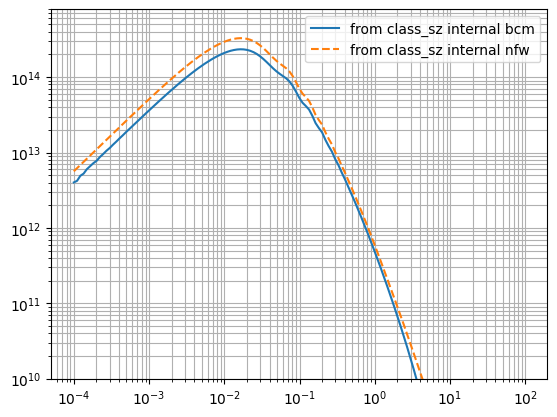

In [16]:
plt.plot(kinternal,kinternal**0*pk2h_internal,label='from class_sz internal bcm',ls='-')
plt.plot(kinternalnfw,kinternalnfw**0*pk2h_internalnfw,label='from class_sz internal nfw',ls='--')
plt.loglog()
plt.legend()
plt.ylim(1e10,8e14)
plt.grid(which='both')